<a href="https://colab.research.google.com/github/tanishqiitp/hcl-project-/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import random

In [ ]:
# ================= STORES =================
stores = pd.DataFrame({
    "store_id": [f"S{i}" for i in range(1, 101)],
    "store_name": [f"Store_{i}" for i in range(1, 101)],
    "store_city": np.random.choice(
        ["Hyderabad", "Bangalore", "Chennai", "Pune", "Delhi"], 100
    ),
    "store_region": np.random.choice(
        ["North", "South", "East", "West"], 100
    ),
    "opening_date": pd.to_datetime(
        np.random.choice(
            ["2018-01-01", "2019-06-01", "2020-01-01", "2021-01-01"], 100
        )
    )
})

# Inject errors
stores.loc[100] = stores.loc[2]               # Duplicate store_id
stores.loc[3, "store_region"] = "INVALID"     # Invalid region
stores.loc[5, "store_name"] = None            # Missing name
stores.loc[7, "opening_date"] = pd.NaT        # Invalid date

stores["opening_date"] = pd.to_datetime(stores["opening_date"], errors="coerce")

# ================= PRODUCTS =================
products = pd.DataFrame({
    "product_id": [f"P{i}" for i in range(1, 101)],
    "product_name": [f"Product_{i}" for i in range(1, 101)],
    "product_category": np.random.choice(
        ["Electronics", "Apparel", "Grocery"], 100
    ),
    "unit_price": np.round(np.random.uniform(50, 3000, 100), 2),
    "current_stock_level": np.random.randint(10, 1000, 100)
})

# Inject errors
products.loc[100] = products.loc[4]           # Duplicate product_id
products.loc[6, "product_category"] = "INVALID"
products.loc[8, "unit_price"] = None
products.loc[10, "current_stock_level"] = -5

# ================= CUSTOMERS =================
customers = pd.DataFrame({
    "customer_id": [f"C{i}" for i in range(1, 101)],
    "first_name": [f"Cust_{i}" for i in range(1, 101)],
    "email": [f"cust{i}@mail.com" for i in range(1, 101)],
    "loyalty_status": np.random.choice(
        ["Bronze", "Silver", "Gold", "VIP"], 100
    ),
    "total_loyalty_points": np.random.randint(100, 5000, 100),
    "last_purchase_date": pd.to_datetime("today") -
        pd.to_timedelta(np.random.randint(1, 365, 100), unit="D"),
    "segment_id": np.random.choice(["HS", "AR", "LS"], 100)
})

# Inject errors
customers.loc[100] = customers.loc[9]          # Duplicate customer_id
customers.loc[11, "email"] = customers.loc[10, "email"]
customers.loc[15, "total_loyalty_points"] = -200
customers.loc[18, "last_purchase_date"] = pd.NaT

customers["last_purchase_date"] = pd.to_datetime(
    customers["last_purchase_date"], errors="coerce"
)

# ================= LOYALTY RULES =================
loyalty_rules = pd.DataFrame({
    "rule_id": [1, 2, 3, 4],
    "rule_name": [
        "Standard Earning",
        "High Value Bonus",
        "Weekend Bonus",
        "Special Campaign"
    ],
    "points_per_unit_spend": [1.0, 1.5, 2.0, -1.0],
    "min_spend_threshold": [0, 2000, 1000, 500],
    "bonus_points": [0, 200, 100, 50]
})

# ================= PROMOTIONS =================
promotions = pd.DataFrame({
    "promotion_id": [f"PR{i}" for i in range(1, 101)],
    "promotion_name": [f"Promo_{i}" for i in range(1, 101)],
    "start_date": pd.date_range("2024-01-01", periods=100, freq="7D"),
    "end_date": pd.date_range("2024-01-10", periods=100, freq="7D"),
    "discount_percentage": np.random.uniform(0.05, 0.5, 100),
    "applicable_category": np.random.choice(
        ["Electronics", "Apparel", "Grocery", "ALL"], 100
    )
})

# Inject errors
promotions.loc[3, "end_date"] = promotions.loc[3, "start_date"] - pd.Timedelta(days=1)
promotions.loc[5, "discount_percentage"] = -0.1
promotions.loc[7, "applicable_category"] = "INVALID"

# ================= SALES HEADER =================
sales_header = pd.DataFrame({
    "transaction_id": [f"T{i}" for i in range(1, 101)],
    "customer_id": np.random.choice(customers["customer_id"], 100),
    "store_id": np.random.choice(stores["store_id"], 100),
    "transaction_date": datetime.today() -
        pd.to_timedelta(np.random.randint(1, 30, 100), unit="D"),
    "total_amount": np.round(np.random.uniform(100, 10000, 100), 2)
})

# Inject errors
sales_header.loc[100] = sales_header.loc[9]
sales_header.loc[12, "customer_id"] = "C999"
sales_header.loc[14, "store_id"] = "INVALID_STORE"
sales_header.loc[16, "total_amount"] = -500

# ================= SALES LINE ITEMS =================
sales_line_items = pd.DataFrame({
    "line_item_id": range(1, 101),
    "transaction_id": np.random.choice(sales_header["transaction_id"], 100),
    "product_id": np.random.choice(products["product_id"], 100),
    "promotion_id": np.random.choice(promotions["promotion_id"], 100),
    "quantity": np.random.randint(1, 5, 100),
    "line_item_amount": np.round(np.random.uniform(100, 5000, 100), 2)
})

# Inject errors
sales_line_items.loc[5, "product_id"] = "P999"
sales_line_items.loc[7, "transaction_id"] = "T999"
sales_line_items.loc[9, "quantity"] = -3
sales_line_items.loc[11, "promotion_id"] = "PR999"

# ================= SAVE FILES =================
stores.to_csv("stores.csv", index=False)
products.to_csv("products.csv", index=False)
customers.to_csv("customers.csv", index=False)
loyalty_rules.to_csv("loyalty_rules.csv", index=False)
promotions.to_csv("promotions.csv", index=False)
sales_header.to_csv("sales_header.csv", index=False)
sales_line_items.to_csv("sales_line_items.csv", index=False)

# **case-1**

In [ ]:
# ================== CLEAN STORES ==================
stores["error_reason"] = ""

# Duplicate store_id
stores.loc[stores.duplicated(subset=["store_id"], keep=False),
           "error_reason"] += "Duplicate store_id | "

# Missing store_name
stores.loc[stores["store_name"].isna(),
           "error_reason"] += "Missing store_name | "

# Invalid store_region
valid_regions = ["North", "South", "East", "West"]
stores.loc[~stores["store_region"].isin(valid_regions),
           "error_reason"] += "Invalid store_region | "

# Invalid opening_date
stores["opening_date"] = pd.to_datetime(stores["opening_date"], errors="coerce")
stores.loc[stores["opening_date"].isna(),
           "error_reason"] += "Invalid opening_date | "

# Opening date in future
stores.loc[stores["opening_date"] > pd.Timestamp.today(),
           "error_reason"] += "Opening date in future | "

staging_stores = stores[stores["error_reason"] == ""].drop(columns=["error_reason"])
quarantine_stores = stores[stores["error_reason"] != ""]

# ================== CLEAN PRODUCTS ==================
products["error_reason"] = ""

# Duplicate product_id
products.loc[products.duplicated(subset=["product_id"], keep=False),
             "error_reason"] += "Duplicate product_id | "

# Missing product_name
products.loc[products["product_name"].isna(),
             "error_reason"] += "Missing product_name | "

# Invalid product_category
valid_categories = ["Electronics", "Apparel", "Grocery"]
products.loc[~products["product_category"].isin(valid_categories),
             "error_reason"] += "Invalid product_category | "

# Invalid unit_price (null or <= 0)
products.loc[products["unit_price"].isna() | (products["unit_price"] <= 0),
             "error_reason"] += "Invalid unit_price | "

# Invalid stock level
products.loc[products["current_stock_level"] < 0,
             "error_reason"] += "Invalid stock_level | "

staging_products = products[products["error_reason"] == ""].drop(columns=["error_reason"])
quarantine_products = products[products["error_reason"] != ""]

# ================== CLEAN CUSTOMERS ==================
customers["error_reason"] = ""

# Duplicate customer_id
customers.loc[customers.duplicated(subset=["customer_id"], keep=False),
              "error_reason"] += "Duplicate customer_id | "

# Duplicate email
customers.loc[customers.duplicated(subset=["email"], keep=False),
              "error_reason"] += "Duplicate email | "

# Invalid email format
customers.loc[~customers["email"].str.contains("@", na=False),
              "error_reason"] += "Invalid email format | "

# Negative loyalty points
customers.loc[customers["total_loyalty_points"] < 0,
              "error_reason"] += "Negative loyalty points | "

# Invalid last_purchase_date
customers["last_purchase_date"] = pd.to_datetime(customers["last_purchase_date"], errors="coerce")
customers.loc[customers["last_purchase_date"].isna(),
              "error_reason"] += "Invalid last_purchase_date | "

staging_customers = customers[customers["error_reason"] == ""].drop(columns=["error_reason"])
quarantine_customers = customers[customers["error_reason"] != ""]

# ================== CLEAN LOYALTY RULES ==================
loyalty_rules["error_reason"] = ""

# Invalid points_per_unit_spend
loyalty_rules.loc[loyalty_rules["points_per_unit_spend"] <= 0,
                  "error_reason"] += "Invalid points_per_unit_spend | "

# Negative min_spend_threshold
loyalty_rules.loc[loyalty_rules["min_spend_threshold"] < 0,
                  "error_reason"] += "Negative min_spend_threshold | "

# Negative bonus_points
loyalty_rules.loc[loyalty_rules["bonus_points"] < 0,
                  "error_reason"] += "Negative bonus_points | "

staging_loyalty_rules = loyalty_rules[loyalty_rules["error_reason"] == ""].drop(columns=["error_reason"])
quarantine_loyalty_rules = loyalty_rules[loyalty_rules["error_reason"] != ""]

# ================== CLEAN PROMOTIONS ==================
promotions["error_reason"] = ""

promotions["start_date"] = pd.to_datetime(promotions["start_date"], errors="coerce")
promotions["end_date"] = pd.to_datetime(promotions["end_date"], errors="coerce")

# Invalid dates
promotions.loc[promotions["start_date"].isna() | promotions["end_date"].isna(),
               "error_reason"] += "Invalid promotion date | "

# Start date after end date
promotions.loc[promotions["start_date"] > promotions["end_date"],
               "error_reason"] += "Start date after end date | "

# Invalid discount percentage
promotions.loc[(promotions["discount_percentage"] <= 0),
               "error_reason"] += "Invalid discount_percentage | "

# Invalid applicable_category
valid_promo_categories = ["Electronics", "Apparel", "Grocery", "ALL"]
promotions.loc[~promotions["applicable_category"].isin(valid_promo_categories),
               "error_reason"] += "Invalid applicable_category | "

staging_promotions = promotions[promotions["error_reason"] == ""].drop(columns=["error_reason"])
quarantine_promotions = promotions[promotions["error_reason"] != ""]

# ================== CLEAN SALES HEADER ==================
sales_header["error_reason"] = ""

# Invalid store_id
sales_header.loc[~sales_header["store_id"].isin(staging_stores["store_id"]),
                 "error_reason"] += "Invalid store_id | "

# Invalid customer_id
sales_header.loc[~sales_header["customer_id"].isin(staging_customers["customer_id"]),
                 "error_reason"] += "Invalid customer_id | "

# Invalid transaction_date
sales_header["transaction_date"] = pd.to_datetime(sales_header["transaction_date"], errors="coerce")
sales_header.loc[sales_header["transaction_date"].isna(),
                 "error_reason"] += "Invalid transaction_date | "

# Negative or zero total_amount
sales_header.loc[sales_header["total_amount"] <= 0,
                 "error_reason"] += "Invalid total_amount | "

staging_sales_header = sales_header[sales_header["error_reason"] == ""].drop(columns=["error_reason"])
quarantine_sales_header = sales_header[sales_header["error_reason"] != ""]

# ================== CLEAN SALES LINE ITEMS ==================
sales_line_items["error_reason"] = ""

# Invalid product_id
sales_line_items.loc[~sales_line_items["product_id"].isin(staging_products["product_id"]),
                     "error_reason"] += "Invalid product_id | "

# Invalid transaction_id
sales_line_items.loc[~sales_line_items["transaction_id"].isin(staging_sales_header["transaction_id"]),
                     "error_reason"] += "Invalid transaction_id | "

# Invalid quantity
sales_line_items.loc[sales_line_items["quantity"] <= 0,
                     "error_reason"] += "Invalid quantity | "

# Invalid promotion_id (if present)
sales_line_items.loc[
    sales_line_items["promotion_id"].notna() &
    ~sales_line_items["promotion_id"].isin(staging_promotions["promotion_id"]),
    "error_reason"
] += "Invalid promotion_id | "

staging_sales_line_items = sales_line_items[sales_line_items["error_reason"] == ""].drop(columns=["error_reason"])
quarantine_sales_line_items = sales_line_items[sales_line_items["error_reason"] != ""]

# ================== SAVE OUTPUTS ==================
staging_stores.to_csv("staging_stores.csv", index=False)
quarantine_stores.to_csv("quarantine_stores.csv", index=False)

staging_products.to_csv("staging_products.csv", index=False)
quarantine_products.to_csv("quarantine_products.csv", index=False)

staging_customers.to_csv("staging_customers.csv", index=False)
quarantine_customers.to_csv("quarantine_customers.csv", index=False)

staging_loyalty_rules.to_csv("staging_loyalty_rules.csv", index=False)
quarantine_loyalty_rules.to_csv("quarantine_loyalty_rules.csv", index=False)

staging_promotions.to_csv("staging_promotions.csv", index=False)
quarantine_promotions.to_csv("quarantine_promotions.csv", index=False)

staging_sales_header.to_csv("staging_sales_header.csv", index=False)
quarantine_sales_header.to_csv("quarantine_sales_header.csv", index=False)

staging_sales_line_items.to_csv("staging_sales_line_items.csv", index=False)
quarantine_sales_line_items.to_csv("quarantine_sales_line_items.csv", index=False)

case-2

In [ ]:
staging_products = pd.read_csv("/content/staging_products.csv")
staging_products.head()

,product_id,product_name,product_category,unit_price,current_stock_level
0,P1,Product_1,Grocery,2212.88,742
1,P2,Product_2,Apparel,341.67,344
2,P3,Product_3,Apparel,1321.11,126
3,P4,Product_4,Electronics,2222.29,977
4,P6,Product_6,Grocery,797.72,224


In [ ]:
staging_promotions = pd.read_csv("/content/staging_promotions.csv")
staging_promotions.head()

,promotion_id,promotion_name,start_date,end_date,discount_percentage,applicable_category
0,PR1,Promo_1,2024-01-01,2024-01-10,0.389727,Electronics
1,PR2,Promo_2,2024-01-08,2024-01-17,0.210554,Electronics
2,PR3,Promo_3,2024-01-15,2024-01-24,0.422329,Electronics
3,PR5,Promo_5,2024-01-29,2024-02-07,0.406722,Grocery
4,PR7,Promo_7,2024-02-12,2024-02-21,0.107183,Grocery


In [ ]:
staging_store_sales_line_items= pd.read_csv("/content/staging_sales_line_items.csv")
staging_store_sales_line_items.head()

,line_item_id,transaction_id,product_id,promotion_id,quantity,line_item_amount
0,1,T65,P34,PR66,3,662.01
1,2,T47,P47,PR61,2,3735.63
2,3,T92,P33,PR16,3,1212.33
3,5,T91,P33,PR45,1,4449.42
4,9,T16,P95,PR74,4,3284.69


In [ ]:
sales_promo = (
    sales_line_items.drop(columns=["error_reason"], errors="ignore")
    .merge(
        promotions.drop(columns=["error_reason"], errors="ignore"),
        on="promotion_id",
        how="left"
    )
    .merge(
        products[["product_id", "product_category"]],
        on="product_id",
        how="left"
    )
)

sales_promo["start_date"] = pd.to_datetime(sales_promo["start_date"], errors="coerce")
sales_promo["end_date"] = pd.to_datetime(sales_promo["end_date"], errors="coerce")

sales_promo = sales_promo[
    (sales_promo["promotion_id"].isna()) |  # baseline sales
    ((sales_promo["start_date"].notna()) &
     (sales_promo["end_date"].notna()) &
     (sales_promo["end_date"] >= sales_promo["start_date"]))
]

sales_promo["revenue"] = sales_promo["line_item_amount"]

promoted_sales = sales_promo[sales_promo["promotion_id"].notna()]
baseline_sales = sales_promo[sales_promo["promotion_id"].isna()]

# Promotional sales summary
promo_summary = (
    promoted_sales
    .groupby(["promotion_id", "product_category"], as_index=False)
    .agg(promo_units=("quantity","sum"), promo_revenue=("revenue","sum"))
)

# Baseline sales summary
baseline_summary = (
    baseline_sales
    .groupby("product_category", as_index=False)
    .agg(base_units=("quantity","sum"), base_revenue=("revenue","sum"))
)

effectiveness = promo_summary.merge(
    baseline_summary,
    on="product_category",
    how="left"
)

effectiveness[["base_units", "base_revenue"]] = effectiveness[["base_units","base_revenue"]].fillna(0)

effectiveness["sales_lift_pct"] = np.where(
    effectiveness["base_units"] > 0,
    ((effectiveness["promo_units"] - effectiveness["base_units"]) / effectiveness["base_units"]) * 100,
    effectiveness["promo_units"] * 100
)

effectiveness["revenue_lift_pct"] = np.where(
    effectiveness["base_revenue"] > 0,
    ((effectiveness["promo_revenue"] - effectiveness["base_revenue"]) / effectiveness["base_revenue"]) * 100,
    effectiveness["promo_revenue"] * 100
)

top_3_promotions = effectiveness.sort_values("sales_lift_pct", ascending=False).head(3)


In [ ]:
print("==== PROMOTION EFFECTIVENESS ====")
effectiveness

==== PROMOTION EFFECTIVENESS ====


,promotion_id,product_category,promo_units,promo_revenue,base_units,base_revenue,sales_lift_pct,revenue_lift_pct
0,PR100,Apparel,2,3172.25,0.0,0.0,200.0,317225.0
1,PR100,Electronics,3,1191.37,0.0,0.0,300.0,119137.0
2,PR12,Electronics,5,2265.09,0.0,0.0,500.0,226509.0
3,PR12,Grocery,1,1945.15,0.0,0.0,100.0,194515.0
4,PR15,Electronics,3,1292.34,0.0,0.0,300.0,129234.0
...,...,...,...,...,...,...,...,...
79,PR95,Electronics,1,1962.30,0.0,0.0,100.0,196230.0
80,PR95,Grocery,1,1888.67,0.0,0.0,100.0,188867.0
81,PR97,Electronics,1,4305.16,0.0,0.0,100.0,430516.0
82,PR98,Apparel,3,3980.78,0.0,0.0,300.0,398078.0


In [ ]:
print("\n==== TOP 3 PROMOTIONS BY SALES LIFT ====")
top_3_promotions


==== TOP 3 PROMOTIONS BY SALES LIFT ====


,promotion_id,product_category,promo_units,promo_revenue,base_units,base_revenue,sales_lift_pct,revenue_lift_pct
54,PR70,Grocery,9,6986.33,0.0,0.0,900.0,698633.0
63,PR79,Grocery,8,3314.25,0.0,0.0,800.0,331425.0
71,PR88,Grocery,8,5436.74,0.0,0.0,800.0,543674.0


/tmp/ipython-input-2714627053.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


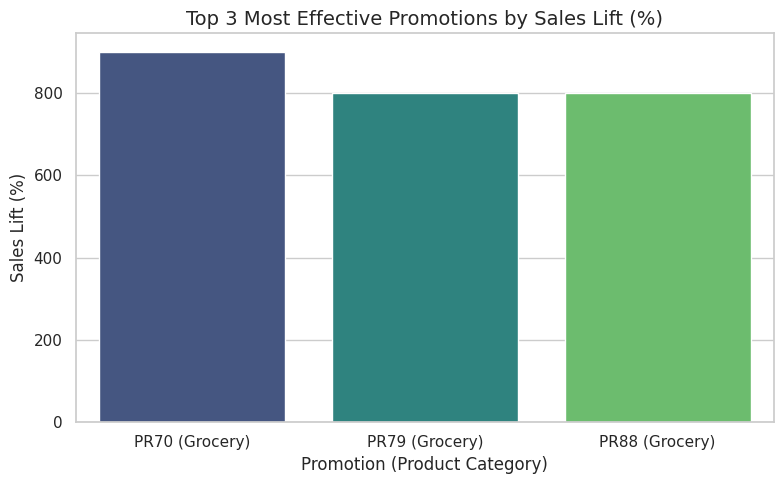

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

viz_df = top_3_promotions.copy()

viz_df["promotion_label"] = (
    viz_df["promotion_id"] + " (" + viz_df["product_category"] + ")"
)

plt.figure(figsize=(8, 5))

sns.barplot(
    data=viz_df,
    x="promotion_label",
    y="sales_lift_pct",
    palette="viridis"
)

plt.title("Top 3 Most Effective Promotions by Sales Lift (%)", fontsize=14)
plt.xlabel("Promotion (Product Category)")
plt.ylabel("Sales Lift (%)")

plt.tight_layout()
plt.show()


# **case-3**

In [ ]:
staging_customers = pd.read_csv("/content/staging_customers.csv")
staging_customers.head()

,customer_id,first_name,email,loyalty_status,total_loyalty_points,last_purchase_date,segment_id
0,C1,Cust_1,cust1@mail.com,Bronze,4971,2025-04-16 10:50:17.157406,AR
1,C2,Cust_2,cust2@mail.com,Silver,3592,2025-01-02 10:50:17.157406,AR
2,C3,Cust_3,cust3@mail.com,VIP,3131,2025-11-21 10:50:17.157406,LS
3,C4,Cust_4,cust4@mail.com,Gold,121,2025-10-15 10:50:17.157406,AR
4,C5,Cust_5,cust5@mail.com,VIP,2997,2025-11-22 10:50:17.157406,LS


In [ ]:
staging_store_sales_headers = pd.read_csv("/content/staging_sales_header.csv")
staging_store_sales_headers.head()

,transaction_id,customer_id,store_id,transaction_date,total_amount
0,T1,C57,S71,2025-11-25 10:50:17.170534,487.73
1,T2,C29,S61,2025-12-14 10:50:17.170534,3484.54
2,T3,C99,S5,2025-12-16 10:50:17.170534,3097.86
3,T4,C69,S60,2025-12-11 10:50:17.170534,8286.73
4,T5,C26,S79,2025-12-18 10:50:17.170534,3604.62


In [ ]:
loyalty_rules = pd.read_csv("/content/loyalty_rules.csv")
loyalty_rules.head()

,rule_id,rule_name,points_per_unit_spend,min_spend_threshold,bonus_points
0,1,Standard Earning,1.0,0,0
1,2,High Value Bonus,1.5,2000,200
2,3,Weekend Bonus,2.0,1000,100
3,4,Special Campaign,-1.0,500,50


In [ ]:
# 1️⃣ Calculate years as customer
staging_customers["years_as_customer"] = (
    pd.Timestamp.now() - pd.to_datetime(staging_customers["last_purchase_date"])
).dt.days // 365


# 2️⃣ Merge transactions with customers
txn_customer = staging_store_sales_headers.merge(
    staging_customers[["customer_id", "total_loyalty_points", "loyalty_status", "years_as_customer"]],
    on="customer_id",
    how="left"
)

# 3️⃣ Define tiered points per spend
def tiered_points(amount):
    if amount < 1000:
        return 1
    elif amount < 5000:
        return 1.5
    else:
        return 2

txn_customer["points_per_unit"] = txn_customer["total_amount"].apply(tiered_points)

# 4️⃣ Loyalty status multiplier
status_multiplier = {"Bronze":1, "Silver":1.2, "Gold":1.5, "Platinum":2}
txn_customer["status_multiplier"] = txn_customer["loyalty_status"].map(status_multiplier)

# 5️⃣ Tenure bonus
def tenure_bonus(years):
    if years < 1:
        return 0
    elif years < 3:
        return 50
    else:
        return 100

txn_customer["tenure_bonus"] = txn_customer["years_as_customer"].apply(tenure_bonus)

# 6️⃣ Calculate earned points
txn_customer["earned_points"] = (
    txn_customer["total_amount"] * txn_customer["points_per_unit"] * txn_customer["status_multiplier"]
) + txn_customer["tenure_bonus"]

# 7️⃣ Aggregate per customer
customer_points_update = txn_customer.groupby("customer_id", as_index=False).agg(
    new_points=("earned_points", "sum")
)

# 8️⃣ Update customer master table
updated_customers = staging_customers.merge(
    customer_points_update,
    on="customer_id",
    how="left"
)

updated_customers["new_points"] = updated_customers["new_points"].fillna(0)
updated_customers["total_loyalty_points"] = (
    updated_customers["total_loyalty_points"] + updated_customers["new_points"]
)
updated_customers.drop(columns=["new_points"], inplace=True)


In [ ]:
# Transaction-level points (points accrued for each transaction)
transaction_points = best_rules.groupby(
    ["transaction_id", "customer_id"], as_index=False
).agg(
    points_earned=("earned_points", "sum")
)

transaction_points.head()


,transaction_id,customer_id,points_earned
0,T1,C57,487.73
1,T10,C64,16523.38
2,T100,C55,13502.32
3,T11,C87,4324.46
4,T12,C39,20008.42


In [ ]:
staging_customers.head()

,customer_id,first_name,email,loyalty_status,total_loyalty_points,last_purchase_date,segment_id,years_as_customer
0,C1,Cust_1,cust1@mail.com,Bronze,4971,2025-04-16 10:50:17.157406,AR,0
1,C2,Cust_2,cust2@mail.com,Silver,3592,2025-01-02 10:50:17.157406,AR,0
2,C3,Cust_3,cust3@mail.com,VIP,3131,2025-11-21 10:50:17.157406,LS,0
3,C4,Cust_4,cust4@mail.com,Gold,121,2025-10-15 10:50:17.157406,AR,0
4,C5,Cust_5,cust5@mail.com,VIP,2997,2025-11-22 10:50:17.157406,LS,0


In [ ]:
updated_customers.head()

,customer_id,first_name,email,loyalty_status,total_loyalty_points,last_purchase_date,segment_id,years_as_customer
0,C1,Cust_1,cust1@mail.com,Bronze,12212.745,2025-04-16 10:50:17.157406,AR,0
1,C2,Cust_2,cust2@mail.com,Silver,12586.978,2025-01-02 10:50:17.157406,AR,0
2,C3,Cust_3,cust3@mail.com,VIP,3131.000,2025-11-21 10:50:17.157406,LS,0
3,C4,Cust_4,cust4@mail.com,Gold,121.000,2025-10-15 10:50:17.157406,AR,0
4,C5,Cust_5,cust5@mail.com,VIP,2997.000,2025-11-22 10:50:17.157406,LS,0


caase-4

In [ ]:
# --------------------------------------------------
# 1. LOAD CLEAN (STAGING) DATA
# --------------------------------------------------
staging_customers = pd.read_csv("staging_customers.csv")
staging_sales_header = pd.read_csv("staging_sales_header.csv")

# Ensure transaction_date is datetime
staging_sales_header["transaction_date"] = pd.to_datetime(
    staging_sales_header["transaction_date"], errors="coerce"
)

# --------------------------------------------------
# 2. AGGREGATE SALES DATA PER CUSTOMER (RFM BASE)
# --------------------------------------------------
sales_agg = (
    staging_sales_header
    .groupby("customer_id", as_index=False)
    .agg(
        frequency=("transaction_id", "count"),
        monetary=("total_amount", "sum"),
        last_purchase_date=("transaction_date", "max")
    )
)

# --------------------------------------------------
# 3. CALCULATE RECENCY
# --------------------------------------------------
reference_date = staging_sales_header["transaction_date"].max()

sales_agg["recency"] = (
    reference_date - sales_agg["last_purchase_date"]
).dt.days

# --------------------------------------------------
# 4. MERGE WITH CUSTOMER & LOYALTY DATA
# --------------------------------------------------
rfm = staging_customers.merge(
    sales_agg,
    on="customer_id",
    how="left"
)

# Fill missing values for customers with no transactions
rfm["frequency"] = rfm["frequency"].fillna(0)
rfm["monetary"] = rfm["monetary"].fillna(0)
rfm["recency"] = rfm["recency"].fillna(999)  # Use high number for no purchases
rfm["total_loyalty_points"] = rfm["total_loyalty_points"].fillna(0)

# --------------------------------------------------
# 5. SEGMENT 1: HIGH-SPENDERS (TOP 10% BY MONETARY)
# --------------------------------------------------
high_spender_threshold = rfm["monetary"].quantile(0.90)

rfm["high_spender_segment"] = np.where(
    rfm["monetary"] >= high_spender_threshold,
    "High-Spender",
    "Regular"
)

# --------------------------------------------------
# 6. SEGMENT 2: AT-RISK CUSTOMERS
# No purchase in 60+ days but has loyalty points
# --------------------------------------------------
rfm["at_risk_segment"] = np.where(
    (rfm["recency"] >= 60) & (rfm["total_loyalty_points"] > 0),
    "At-Risk",
    "Active"
)

# --------------------------------------------------
# 7. FINAL CUSTOMER SEGMENTATION VIEW
# --------------------------------------------------
customer_segments = rfm[[
    "customer_id",
    "recency",
    "frequency",
    "monetary",
    "total_loyalty_points",
    "high_spender_segment",
    "at_risk_segment"
]]

# --------------------------------------------------
# 8. SAVE OUTPUT
# --------------------------------------------------
customer_segments.to_csv(
    "customer_segmentation_case_4.csv",
    index=False
)


In [ ]:
# --------------------------------------------------
# 9. DISPLAY SAMPLE OUTPUT
# --------------------------------------------------
print("===== CUSTOMER SEGMENTATION (CASE 4) =====")
customer_segments.head(10)

===== CUSTOMER SEGMENTATION (CASE 4) =====


,customer_id,recency,frequency,monetary,total_loyalty_points,high_spender_segment,at_risk_segment
0,C1,20.0,1.0,4827.83,4971,Regular,Active
1,C2,21.0,1.0,4997.21,3592,Regular,Active
2,C3,6.0,2.0,8755.34,3131,Regular,Active
3,C4,999.0,0.0,0.00,121,Regular,At-Risk
4,C5,999.0,0.0,0.00,2997,Regular,At-Risk
5,C6,999.0,0.0,0.00,1904,Regular,At-Risk
6,C7,999.0,0.0,0.00,2802,Regular,At-Risk
7,C8,27.0,1.0,2526.36,2361,Regular,Active
8,C9,999.0,0.0,0.00,444,Regular,At-Risk
9,C13,999.0,0.0,0.00,4945,Regular,At-Risk


In [ ]:
print("\n===== SEGMENT COUNTS =====")
print(customer_segments.groupby(["high_spender_segment", "at_risk_segment"] ).size())


===== SEGMENT COUNTS =====
high_spender_segment  at_risk_segment
High-Spender          Active             10
Regular               Active             49
                      At-Risk            36
dtype: int64


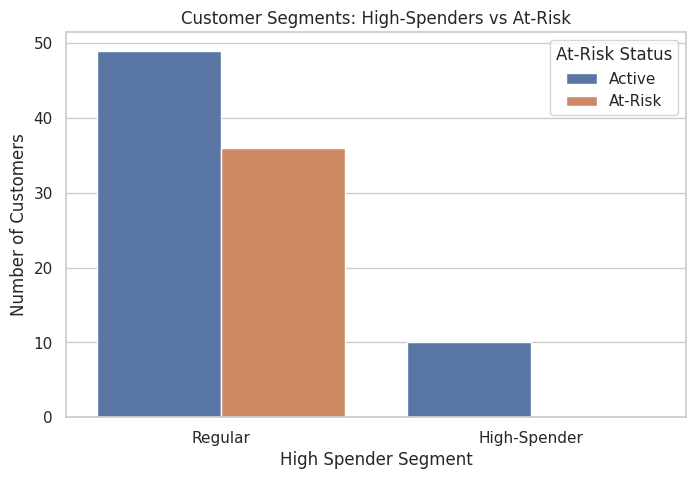

In [ ]:
# -------------------------------
# 1. Count of Customers per Segment
# -------------------------------
plt.figure(figsize=(8,5))
sns.countplot(
    data=customer_segments,
    x="high_spender_segment",
    hue="at_risk_segment"
)
plt.title("Customer Segments: High-Spenders vs At-Risk")
plt.ylabel("Number of Customers")
plt.xlabel("High Spender Segment")
plt.legend(title="At-Risk Status")
plt.show()

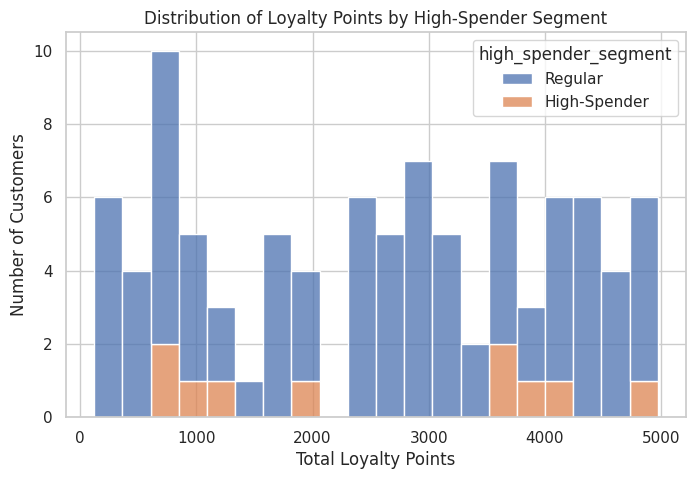

In [ ]:
# -------------------------------
# 2. Distribution of Total Loyalty Points
# -------------------------------
plt.figure(figsize=(8,5))
sns.histplot(
    customer_segments,
    x="total_loyalty_points",
    bins=20,
    hue="high_spender_segment",
    multiple="stack"
)
plt.title("Distribution of Loyalty Points by High-Spender Segment")
plt.xlabel("Total Loyalty Points")
plt.ylabel("Number of Customers")
plt.show()

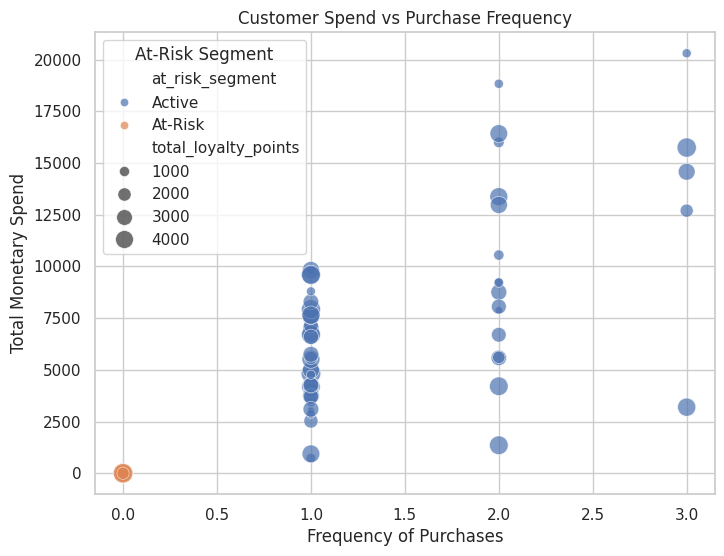

In [ ]:
# -------------------------------
# 3. Scatter: Monetary vs Frequency colored by At-Risk
# -------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=customer_segments,
    x="frequency",
    y="monetary",
    hue="at_risk_segment",
    size="total_loyalty_points",
    sizes=(20,200),
    alpha=0.7
)
plt.title("Customer Spend vs Purchase Frequency")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Total Monetary Spend")
plt.legend(title="At-Risk Segment")
plt.show()

case-5

In [ ]:
# customers who earned points in this run
customers_with_new_points = customer_points_update[
    customer_points_update["new_points"] > 0
]

notification_df = customers_with_new_points.merge(
    staging_customers[["customer_id", "first_name", "email", "total_loyalty_points"]],
    on="customer_id",
    how="left"
)

def generate_email(row):
    return f"""
    Hi {row['first_name']},

    🎉 Great news! You've just earned {int(row['new_points'])} loyalty points.

    ⭐ Your total loyalty balance is now: {int(row['total_loyalty_points'])} points.

    Thank you for shopping with us.
    Keep earning rewards with every purchase!

    — Your Loyalty Team
    """

notification_df["email_content"] = notification_df.apply(generate_email, axis=1)

def send_email(email, content):
    print("====================================")
    print(f"Sending email to: {email}")
    print(content)
    print("Email sent successfully ✅")
    print("====================================\n")

for _, row in notification_df.iterrows():
    send_email(row["email"], row["email_content"])



Sending email to: cust1@mail.com

    Hi Cust_1,

    🎉 Great news! You've just earned 17247 loyalty points.

    ⭐ Your total loyalty balance is now: 4971 points.

    Thank you for shopping with us.
    Keep earning rewards with every purchase!

    — Your Loyalty Team
    
Email sent successfully ✅

Sending email to: cust14@mail.com

    Hi Cust_14,

    🎉 Great news! You've just earned 29921 loyalty points.

    ⭐ Your total loyalty balance is now: 573 points.

    Thank you for shopping with us.
    Keep earning rewards with every purchase!

    — Your Loyalty Team
    
Email sent successfully ✅

Sending email to: cust15@mail.com

    Hi Cust_15,

    🎉 Great news! You've just earned 14719 loyalty points.

    ⭐ Your total loyalty balance is now: 241 points.

    Thank you for shopping with us.
    Keep earning rewards with every purchase!

    — Your Loyalty Team
    
Email sent successfully ✅

Sending email to: cust17@mail.com

    Hi Cust_17,

    🎉 Great news! You've just earn

case-6

In [ ]:
# --------------------------------------------------
# 1. LOAD STAGING DATA
# --------------------------------------------------
staging_stores = pd.read_csv("staging_stores.csv")
staging_products = pd.read_csv("staging_products.csv")
staging_sales_line_items = pd.read_csv("staging_sales_line_items.csv")
staging_sales_header = pd.read_csv("staging_sales_header.csv")

# Convert transaction_date to datetime
staging_sales_header["transaction_date"] = pd.to_datetime(
    staging_sales_header["transaction_date"], errors="coerce"
)

# Merge sales_line_items with store info from sales_header
sales_items = staging_sales_line_items.merge(
    staging_sales_header[["transaction_id", "store_id", "transaction_date"]],
    on="transaction_id",
    how="left"
)

# --------------------------------------------------
# 2. SIMULATE DAILY STORE INVENTORY
# --------------------------------------------------
dates = pd.date_range(
    staging_sales_header["transaction_date"].min(),
    staging_sales_header["transaction_date"].max()
)

inventory_records = []
for store in staging_stores["store_id"]:
    for product in staging_products["product_id"]:
        for date in dates:
            inventory_records.append({
                "store_id": store,
                "product_id": product,
                "date": date,
                "stock_level": np.random.randint(0, 50)  # Non-negative stock
            })

inventory = pd.DataFrame(inventory_records)

# --------------------------------------------------
# 3. IDENTIFY TOP 5 BEST-SELLING PRODUCTS
# --------------------------------------------------
top_products = (
    sales_items.groupby("product_id")
    .agg(total_units=("quantity", "sum"))
    .sort_values("total_units", ascending=False)
    .head(5)
    .reset_index()
)

# --------------------------------------------------
# 4. FILTER INVENTORY FOR TOP PRODUCTS
# --------------------------------------------------
top_inventory = inventory.merge(top_products, on="product_id", how="inner")

# --------------------------------------------------
# 5. CALCULATE OUT-OF-STOCK PERCENTAGE
# --------------------------------------------------
stock_analysis = (
    top_inventory
    .groupby(["store_id", "product_id"])
    .agg(
        total_days=("date", "count"),
        out_of_stock_days=("stock_level", lambda x: (x <= 0).sum())
    )
    .reset_index()
)

stock_analysis["out_of_stock_pct"] = (
    stock_analysis["out_of_stock_days"] / stock_analysis["total_days"] * 100
)

# --------------------------------------------------
# 6. ESTIMATE POTENTIAL LOST SALES
# --------------------------------------------------
# Average daily sales per store-product for top products
avg_sales = (
    sales_items[sales_items["product_id"].isin(top_products["product_id"])]
    .groupby(["store_id", "product_id"], as_index=False)
    .agg(avg_daily_sales=("quantity", "mean"))
)

stock_analysis = stock_analysis.merge(
    avg_sales, on=["store_id", "product_id"], how="left"
).merge(
    staging_products[["product_id", "product_name", "unit_price"]],
    on="product_id",
    how="left"
)

# Fill missing values
stock_analysis["unit_price"] = stock_analysis["unit_price"].fillna(0)
stock_analysis["avg_daily_sales"] = stock_analysis["avg_daily_sales"].fillna(0)

# Calculate estimated lost revenue
stock_analysis["estimated_lost_revenue"] = (
    stock_analysis["out_of_stock_days"]
    * stock_analysis["avg_daily_sales"]
    * stock_analysis["unit_price"]
)

# --------------------------------------------------
# 7. FINAL OUTPUT
# --------------------------------------------------
final_inventory_impact = stock_analysis.sort_values(
    "estimated_lost_revenue", ascending=False
)

final_inventory_impact.to_csv(
    "inventory_sales_impact_case_6.csv", index=False
)

print("===== INVENTORY & SALES IMPACT (CASE 6) =====")
print(final_inventory_impact.head(10))


===== INVENTORY & SALES IMPACT (CASE 6) =====
    store_id product_id  total_days  out_of_stock_days  out_of_stock_pct  \
346      S74        P58          29                  2          6.896552   
292      S64        P73          29                  1          3.448276   
359      S76        P89          29                  1          3.448276   
463      S96        P78          29                  1          3.448276   
327      S70        P73          29                  0          0.000000   
326      S70        P58          29                  1          3.448276   
325      S70        P31          29                  0          0.000000   
324       S7        P89          29                  1          3.448276   
323       S7        P78          29                  0          0.000000   
322       S7        P73          29                  1          3.448276   

     avg_daily_sales product_name  unit_price  estimated_lost_revenue  
346              4.0   Product_58     2638.38

In [ ]:
plt.figure()
plt.bar(top_products["product_id"], top_products["total_units"])
plt.xlabel("Product ID")
plt.ylabel("Total Units Sold")
plt.title("Top 5 Best-Selling Products")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
top_store_product_loss = final_inventory_impact.head(10)

plt.figure()
plt.barh(
    top_store_product_loss["store_id"] + " | " +
    top_store_product_loss["product_name"],
    top_store_product_loss["estimated_lost_revenue"]
)
plt.xlabel("Estimated Lost Revenue")
plt.ylabel("Store | Product")
plt.title("Top 10 Store–Product Loss Contributors")
plt.tight_layout()
plt.show()


In [ ]:
selected_product = top_products["product_id"].iloc[0]

product_inventory = inventory[
    inventory["product_id"] == selected_product
]

plt.figure()
plt.plot(
    product_inventory["date"],
    product_inventory["stock_level"]
)
plt.xlabel("Date")
plt.ylabel("Stock Level")
plt.title(f"Inventory Trend for Product {selected_product}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
